In [ ]:
# Neural Style Transfer Project

## This project applies neural style transfer to combine the content of one image with the style of another using TensorFlow.

In [ ]:
## In this section, we import the necessary libraries.
import os
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

In [5]:
##Converts a TensorFlow tensor into a PIL Image.

os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

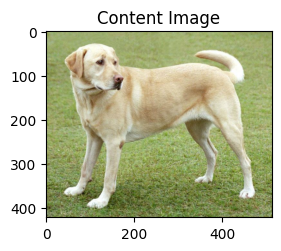

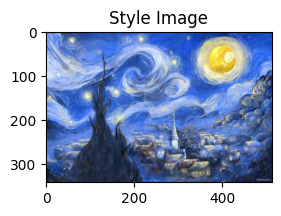

In [8]:
##this loads and shows us the styled image
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.show()
    content_path = 'content.jpg'  
style_path = 'style.jpg'     
content_image = load_img(content_path)
style_image = load_img(style_path)
plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')
plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')
plt.show()

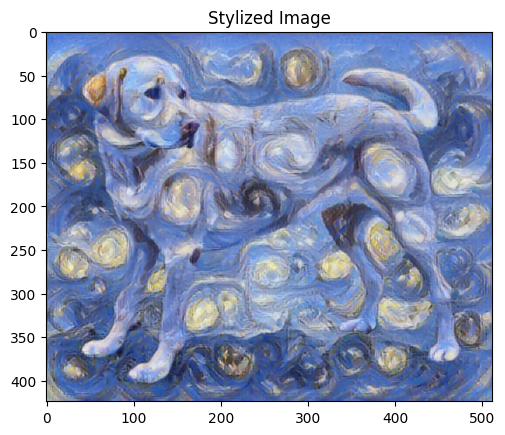

In [7]:
##This code snippet applies a pre-trained neural style transfer model from TensorFlow Hub to blend the content of one image with the artistic style of another. 
##The model processes the content and style images to generate a new, stylized image. The resulting image is then displayed and saved as stylized_image.jpg, combining the content of the original image with the visual characteristics of the style image.
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
imshow(stylized_image, 'Stylized Image')
result_image = tensor_to_image(stylized_image)
result_image.save('stylized_image.jpg')
